In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Reviews.csv', engine = 'pyarrow')
print(df.shape)

(568454, 10)


In [3]:
df1 = df.sample(10000, random_state = 1)

In [4]:
print(df1.shape)
df1.head()

(10000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
288312,288313,B000ENUC3S,AN66F3Q4QNU43,Donna Speaker,0,0,5,1340496000,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...
431726,431727,B002TMV3CG,A3G007LQX6KGOD,SevereWX,0,0,5,1287878400,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...
110311,110312,B004867T24,A11LNY2OLQSUSV,M. Castillo,0,0,5,1331769600,great treat,my girls absolutely loved this tuna. they were...
91855,91856,B004U7KPY0,A1QCYVHWO5934U,"PistolaMia ""PistolaMia""",0,0,5,1332806400,Daily Calming,The vendor is fast and dependable. The tea is ...
338855,338856,B000FD78R0,A30U2QQN2FFHE9,J. Amicucci,2,3,5,1271376000,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...


In [5]:
df1.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [6]:
df1['Score'].value_counts()

Score
5    6344
4    1420
1     925
3     785
2     526
Name: count, dtype: int64

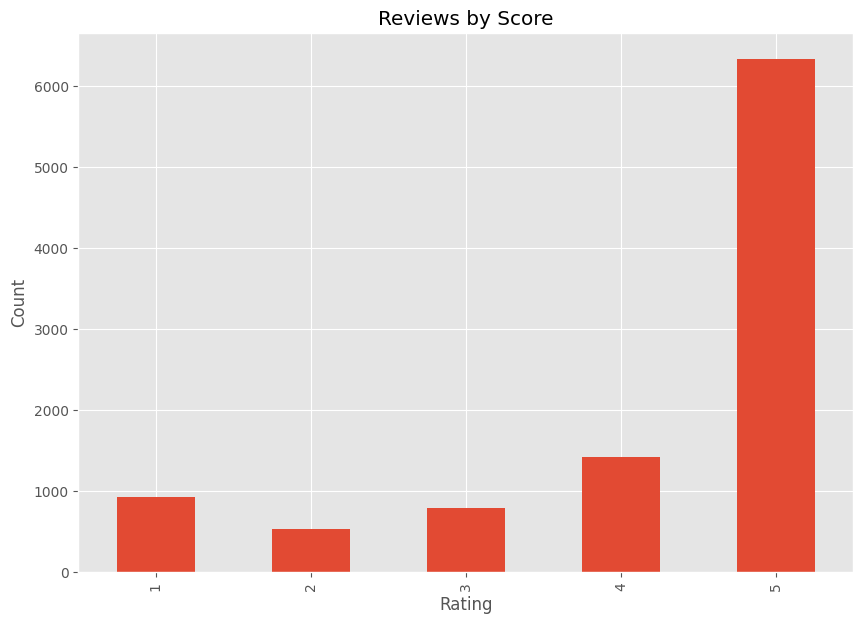

In [7]:
df1['Score'].value_counts().sort_index().plot(kind='bar', figsize=(10, 7))

plt.title("Reviews by Score")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### Preprocessing the data i.e removing stop words and punctuations

In [8]:
import spacy

nlp = spacy.load('en_core_web_sm',disable=['parser','ner'])

In [9]:
def preprocess(text):
    """Preprocess text by removing punctuation, converting to lowercase, and tokenizing."""
    doc = nlp(text)
    preprocessed_text = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop]
    return ' '.join(preprocessed_text)

In [10]:
df1['preprocessed_txt'] = df1['Text'].apply(preprocess)

# VADER(Valence Aware Dictionary and sEntiment Reasoner)

1. It uses "Bag of Words" approach.
2. It does not understands the relationship between words.
3. To use that we will use nltk's SentimentIntensityAnalyser - It gives value/score to a word in (neg/neu/pos)

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [12]:
sia_dict = {}

for index, row in df1.iterrows():
    sia_dict[index] = sia.polarity_scores(row['preprocessed_txt'])

In [13]:
sia_dict

{288312: {'neg': 0.166, 'neu': 0.553, 'pos': 0.281, 'compound': 0.5994},
 431726: {'neg': 0.085, 'neu': 0.744, 'pos': 0.172, 'compound': 0.6151},
 110311: {'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.9542},
 91855: {'neg': 0.0, 'neu': 0.387, 'pos': 0.613, 'compound': 0.9134},
 338855: {'neg': 0.14, 'neu': 0.617, 'pos': 0.243, 'compound': 0.9201},
 243608: {'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'compound': 0.7845},
 152343: {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.8439},
 336202: {'neg': 0.172, 'neu': 0.552, 'pos': 0.276, 'compound': 0.128},
 488611: {'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'compound': -0.4767},
 103618: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 420252: {'neg': 0.124, 'neu': 0.619, 'pos': 0.257, 'compound': 0.3612},
 349113: {'neg': 0.092, 'neu': 0.747, 'pos': 0.16, 'compound': 0.8807},
 443517: {'neg': 0.054, 'neu': 0.604, 'pos': 0.342, 'compound': 0.9642},
 498073: {'neg': 0.084, 'neu': 0.314, 'pos': 0.603, 'compound': 0.9313},


In [14]:
sia_df = pd.DataFrame(sia_dict).T

In [15]:
df_with_sia = pd.concat([df1,sia_df],axis=1)

In [16]:
df_with_sia.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_txt,neg,neu,pos,compound
288312,288313,B000ENUC3S,AN66F3Q4QNU43,Donna Speaker,0,0,5,1340496000,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...,love cherry pie lara bar good tasty bar suga...,0.166,0.553,0.281,0.5994
431726,431727,B002TMV3CG,A3G007LQX6KGOD,SevereWX,0,0,5,1287878400,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...,melitta cafe collection blanc et noir coffee s...,0.085,0.744,0.172,0.6151
110311,110312,B004867T24,A11LNY2OLQSUSV,M. Castillo,0,0,5,1331769600,great treat,my girls absolutely loved this tuna. they were...,girl absolutely love tuna heaven tasty treat b...,0.000,0.388,0.612,0.9542
91855,91856,B004U7KPY0,A1QCYVHWO5934U,"PistolaMia ""PistolaMia""",0,0,5,1332806400,Daily Calming,The vendor is fast and dependable. The tea is ...,vendor fast dependable tea simply good way rel...,0.000,0.387,0.613,0.9134
338855,338856,B000FD78R0,A30U2QQN2FFHE9,J. Amicucci,2,3,5,1271376000,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...,update 8/9/2010 < br />a lot happen couple mon...,0.140,0.617,0.243,0.9201


<Axes: xlabel='Score', ylabel='compound'>

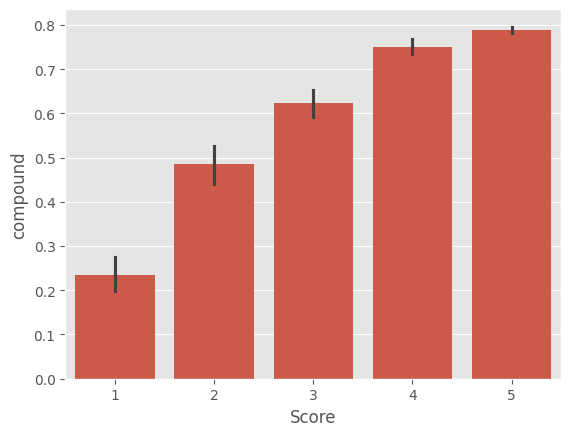

In [17]:
sns.barplot(x = df_with_sia['Score'],y = df_with_sia['compound'])

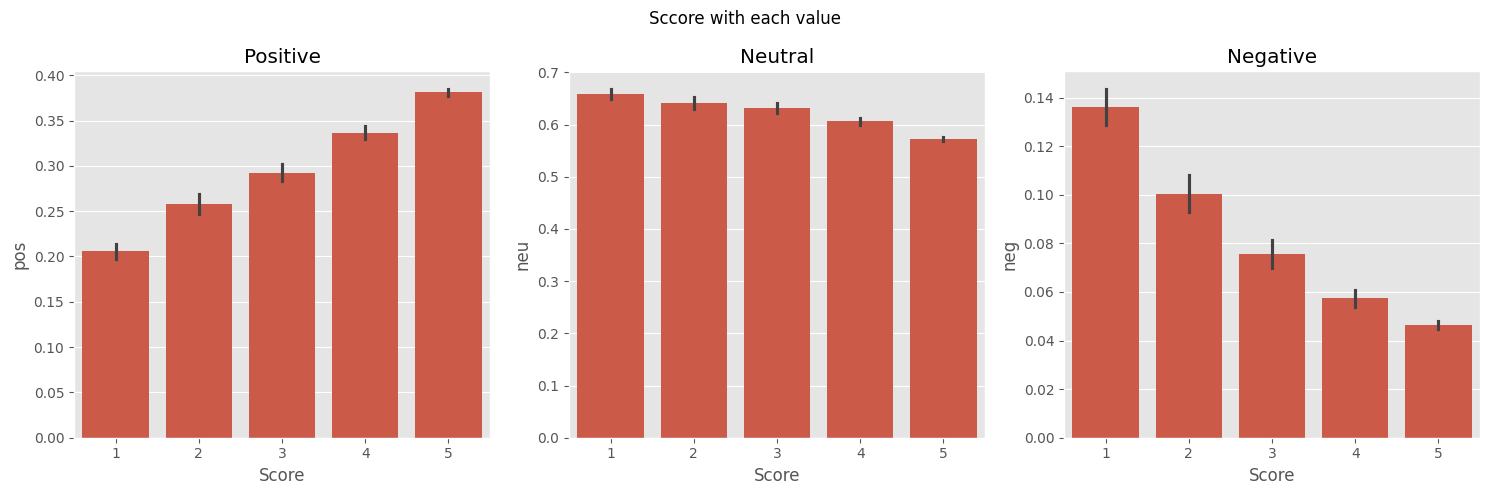

In [18]:
# we subplot positive, negative and neutral

fig,ax = plt.subplots(1,3, figsize = (15,5))

plt.suptitle("Sccore with each value")
sns.barplot(x = df_with_sia['Score'],y = df_with_sia['pos'], ax = ax[0])
sns.barplot(x = df_with_sia['Score'],y = df_with_sia['neu'], ax = ax[1])
sns.barplot(x = df_with_sia['Score'],y = df_with_sia['neg'], ax = ax[2])
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.tight_layout()


# RoBERTa Pretrained Model

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [21]:
text = "the food was not good"
encoded_text = tokenizer(text, return_tensors='pt')
model_output = model(**encoded_text)
score = model_output[0][0].detach().numpy()
roberta_score = softmax(score)

score_dict = {
    'roberta_neg':roberta_score[0],
    'roberta_neu':roberta_score[1],
    'roberta_pos':roberta_score[2]
}
score_dict

{'roberta_neg': 0.9735387,
 'roberta_neu': 0.023510564,
 'roberta_pos': 0.002950858}

In [22]:
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    model_output = model(**encoded_text)
    score = model_output[0][0].detach().numpy()
    roberta_score = softmax(score)

    score_dict = {
        'roberta_neg':roberta_score[0],
        'roberta_neu':roberta_score[1],
        'roberta_pos':roberta_score[2]
    }
    return score_dict

In [23]:
roberta_dict = {}
for index, row in df_with_sia.iterrows():
    try:
        roberta_dict[index] = polarity_scores_roberta(row['preprocessed_txt'])
    except:
        print(f"Error: {index}")

Error: 379249
Error: 269489
Error: 253457
Error: 27584
Error: 267387
Error: 543749
Error: 4306
Error: 557533
Error: 362746
Error: 557771
Error: 228752
Error: 167872
Error: 278070


In [24]:
roberta_df = pd.DataFrame(roberta_dict).T
roberta_df.head()

,roberta_neg,roberta_neu,roberta_pos
288312,0.002675,0.021985,0.975340
431726,0.009196,0.610664,0.380141
110311,0.003797,0.021736,0.974467
91855,0.001806,0.018325,0.979869
338855,0.280440,0.442202,0.277358


In [25]:
df_with_roberta = pd.concat([df_with_sia,roberta_df],axis=1)

In [26]:
df_with_roberta.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_txt,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos
288312,288313,B000ENUC3S,AN66F3Q4QNU43,Donna Speaker,0,0,5,1340496000,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...,love cherry pie lara bar good tasty bar suga...,0.166,0.553,0.281,0.5994,0.002675,0.021985,0.975340
431726,431727,B002TMV3CG,A3G007LQX6KGOD,SevereWX,0,0,5,1287878400,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...,melitta cafe collection blanc et noir coffee s...,0.085,0.744,0.172,0.6151,0.009196,0.610664,0.380141
110311,110312,B004867T24,A11LNY2OLQSUSV,M. Castillo,0,0,5,1331769600,great treat,my girls absolutely loved this tuna. they were...,girl absolutely love tuna heaven tasty treat b...,0.000,0.388,0.612,0.9542,0.003797,0.021736,0.974467
91855,91856,B004U7KPY0,A1QCYVHWO5934U,"PistolaMia ""PistolaMia""",0,0,5,1332806400,Daily Calming,The vendor is fast and dependable. The tea is ...,vendor fast dependable tea simply good way rel...,0.000,0.387,0.613,0.9134,0.001806,0.018325,0.979869
338855,338856,B000FD78R0,A30U2QQN2FFHE9,J. Amicucci,2,3,5,1271376000,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...,update 8/9/2010 < br />a lot happen couple mon...,0.140,0.617,0.243,0.9201,0.280440,0.442202,0.277358


In [27]:
df_with_roberta.rename(columns = {'pos':'vader_pos','neu':'vader_neu','neg':'vader_neg'}, inplace=True)

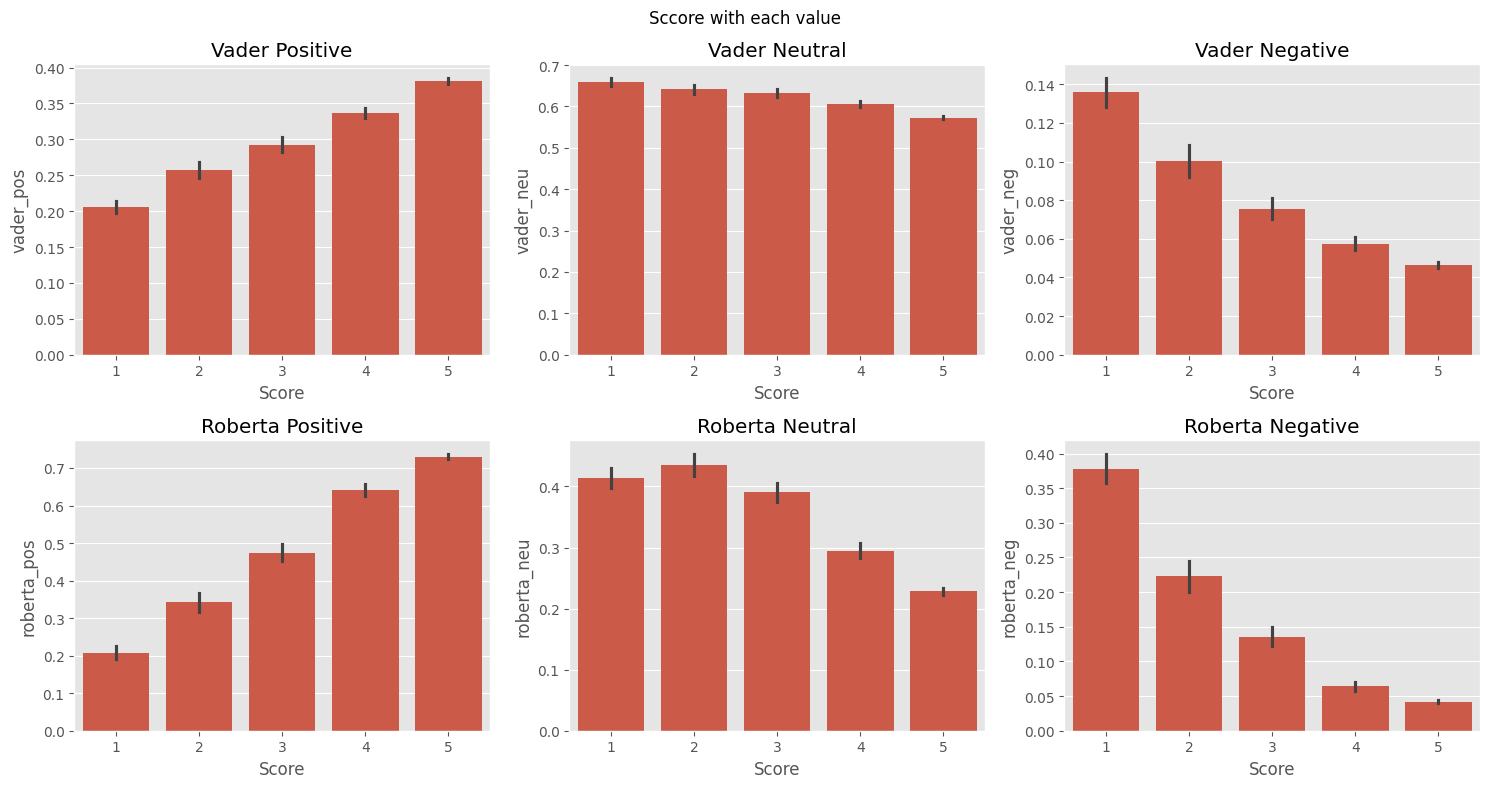

In [28]:
# we subplot positive, negative and neutral

fig,ax = plt.subplots(2,3, figsize = (15,8))

plt.suptitle("Sccore with each value")
sns.barplot(x = df_with_roberta['Score'],y = df_with_roberta['vader_pos'], ax = ax[0,0])
sns.barplot(x = df_with_roberta['Score'],y = df_with_roberta['vader_neu'], ax = ax[0,1])
sns.barplot(x = df_with_roberta['Score'],y = df_with_roberta['vader_neg'], ax = ax[0,2])
ax[0,0].set_title('Vader Positive')
ax[0,1].set_title('Vader Neutral')
ax[0,2].set_title('Vader Negative')

sns.barplot(x = df_with_roberta['Score'],y = df_with_roberta['roberta_pos'], ax = ax[1,0])
sns.barplot(x = df_with_roberta['Score'],y = df_with_roberta['roberta_neu'], ax = ax[1,1])
sns.barplot(x = df_with_roberta['Score'],y = df_with_roberta['roberta_neg'], ax = ax[1,2])
ax[1,0].set_title('Roberta Positive')
ax[1,1].set_title('Roberta Neutral')
ax[1,2].set_title('Roberta Negative')

plt.tight_layout()

In [57]:
# Review the roberta and vader scores
#Lets check roberta values - Positive 1 Star
df_with_roberta[df_with_roberta['Score'] == 1].sort_values('roberta_pos', ascending = False)['Text'].values[0]

'The first batch was pretty good. In the second batch only about 50% was edible. Tough, chewy and not fun to eat.'

In [58]:
#Lets check Vader values - Positive 1 Star
df_with_roberta[df_with_roberta['Score'] == 1].sort_values('vader_pos', ascending = False)['Text'].values[0]

"This wasn't the best, but it was alright. I will not buy this product again!"

In [59]:
#Lets check roberta values - Negative 5 Star
df_with_roberta[df_with_roberta['Score'] == 5].sort_values('roberta_neg', ascending = False)['Text'].values[0]

"I used to use liquid nitrogen and believe me it was painful!<br /><br />I nearly lost one of my fingers once, but now it's all in the past all thanks to Poop Freeze. My life is now complete and worriless."

In [60]:
#Lets check vader values - Negative 5 Star
df_with_roberta[df_with_roberta['Score'] == 5].sort_values('vader_neg', ascending = False)['Text'].values[0]

"Hadn't had these for years...couldn't find them locally.  They are as great as I remember them  No complaints on shipping either.  All round great buy!"

# Using Transformers Pipeline

In [69]:
from transformers import pipeline

sent_pipeline = pipeline('sentiment-analysis',model = 'distilbert/distilbert-base-uncased-finetuned-sst-2-english')


In [71]:
sent_pipeline("I used to use liquid nitrogen and believe me it was painful!<br /><br />I nearly lost one of my fingers once, but now it's all in the past all thanks to Poop Freeze. My life is now complete and worriless.")

[{'label': 'NEGATIVE', 'score': 0.9992351531982422}]